# Assignment 0 Data Visualisation for Regression
Name: Gokul Nithin Kumar Rajakumar
Student ID: 801082252

# Introduction of Data for Regression and Source
    This dataset is all about predicting temperature forecasting. The Data is recorded for aver a period of seven years at Max Planck Institute for Biogeochemistry in Jena, Germany from 2009-2016.
    
    In this dataset there are 15 different features such as 
    i. air temperature
    ii. atmospheric pressure
    iii. humidity
    iv. wind direction 
    etc... 
        that were recorded every 10 minutes, over a period of seven years from 2009–2016.
    

# Reading the Data

In [96]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [13]:
#reading the dataset using pandas
df = pd.read_csv("D:\\UNCC\\Sem 2\\Machine Learning\\Assignment 0\\ML Regression\\jena_climate_2009_2016.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00


# Data Preprocessing

In [4]:
#to first get to know the information about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [5]:
#To check if there are any null values in the dataset
df.isna().any()

Date Time          False
p (mbar)           False
T (degC)           False
Tpot (K)           False
Tdew (degC)        False
rh (%)             False
VPmax (mbar)       False
VPact (mbar)       False
VPdef (mbar)       False
sh (g/kg)          False
H2OC (mmol/mol)    False
rho (g/m**3)       False
wv (m/s)           False
max. wv (m/s)      False
wd (deg)           False
dtype: bool

## Observation
    Since all are FALSE, there are no samples with null values in them.

In [26]:
# Converting Date and Time to General Format so that they can be used efficiently
date_time_modified= df['Date Time'].map(pd.to_datetime)
date_time_modified

0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
5        2009-01-01 01:00:00
6        2009-01-01 01:10:00
7        2009-01-01 01:20:00
8        2009-01-01 01:30:00
9        2009-01-01 01:40:00
10       2009-01-01 01:50:00
11       2009-01-01 02:00:00
12       2009-01-01 02:10:00
13       2009-01-01 02:20:00
14       2009-01-01 02:30:00
15       2009-01-01 02:40:00
16       2009-01-01 02:50:00
17       2009-01-01 03:00:00
18       2009-01-01 03:10:00
19       2009-01-01 03:20:00
20       2009-01-01 03:30:00
21       2009-01-01 03:40:00
22       2009-01-01 03:50:00
23       2009-01-01 04:00:00
24       2009-01-01 04:10:00
25       2009-01-01 04:20:00
26       2009-01-01 04:30:00
27       2009-01-01 04:40:00
28       2009-01-01 04:50:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420522   2016-12-31 19:20:00
420523   2016-12-31 19:30:00
420524   2016-

In [95]:
#After converting date and time to general format extracting useful information from them like seperating day, 
#month and year and storing them in new columns

def get_dom(date_time_modified):
    return date_time_modified.day

df['dom'] = df['Date Time'].map(get_dom)


def get_weekday(date_time_modified):
    return date_time_modified.weekday()

df['Weekday'] = df['Date Time'].map(get_weekday)


def get_hour(date_time_modified):
    return date_time_modified.hour

df['hour'] = df['Date Time'].map(get_hour)


def get_month(date_time_modified):
    return date_time_modified.month

df['month'] = df['Date Time'].map(get_month)

def get_year(date_time_modified):
    return date_time_modified.year

df['year'] = df['Date Time'].map(get_year)

df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),dom,Weekday,hour,month,year
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30,1,3,0,1,2009
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10,1,3,0,1,2009
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60,1,3,0,1,2009
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00,1,3,0,1,2009
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30,1,3,0,1,2009
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70,1,3,1,1,2009
6,2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50,1,3,1,1,2009
7,2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60,1,3,1,1,2009
8,2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50,1,3,1,1,2009
9,2009-01-01 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00,1,3,1,1,2009


## Observation
    Here we have formatted the date and time attribute and extracted new columns such as day, weekday,hour,month,year.

In [6]:
#to describe the entire dataset and to give the overall view of it.
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


# Visualization of the Data

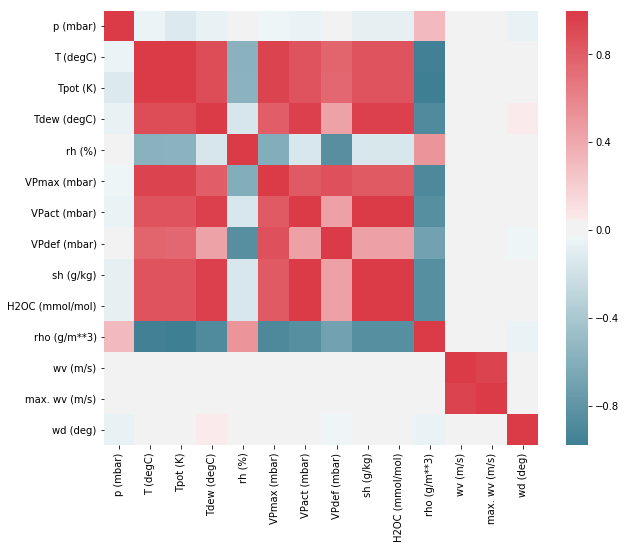

In [25]:
#creating a heat map for the entire dataset to depict the relation and association between the features.
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

## Observation
    This graph describes in detail the relation and association between the attributes the values ranges from -1 to 1 ie. 
    -1 being highly not related and 1 being hightly related.

In [67]:
#Now for visualizing the forecast for each day during December 2009 we must first filter the samples
df_filtered_by_month = df.query('month==12 and year==2009')
df_filtered_by_month

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),dom,Weekday,hour,month,year
1583,2009-12-01 00:00:00,1003.34,-8.96,263.95,-10.57,88.0,3.10,2.72,0.37,1.69,2.72,1321.60,2.71,4.38,174.00,1,1,0,12,2009
1584,2009-12-01 00:10:00,1003.25,-8.87,264.04,-10.59,87.2,3.12,2.72,0.40,1.69,2.71,1321.03,2.88,4.25,181.60,1,1,0,12,2009
1585,2009-12-01 00:20:00,1003.21,-8.95,263.97,-10.79,86.4,3.10,2.68,0.42,1.66,2.67,1321.40,3.05,4.38,181.30,1,1,0,12,2009
1586,2009-12-01 00:30:00,1003.10,-9.15,263.78,-10.96,86.6,3.05,2.64,0.41,1.64,2.63,1322.27,3.24,4.38,176.50,1,1,0,12,2009
1587,2009-12-01 00:40:00,1003.01,-9.14,263.79,-10.88,87.1,3.05,2.66,0.39,1.65,2.65,1322.09,3.00,4.63,175.20,1,1,0,12,2009
1588,2009-12-01 00:50:00,1002.86,-8.82,264.12,-10.56,87.1,3.13,2.73,0.40,1.69,2.72,1320.27,2.85,4.25,182.70,1,1,0,12,2009
1589,2009-12-01 01:00:00,1002.67,-8.80,264.16,-10.67,86.2,3.13,2.70,0.43,1.68,2.70,1319.93,2.58,3.75,197.40,1,1,1,12,2009
1590,2009-12-01 01:10:00,1002.64,-8.68,264.28,-10.52,86.4,3.16,2.73,0.43,1.70,2.73,1319.27,2.09,3.50,187.00,1,1,1,12,2009
1591,2009-12-01 01:20:00,1002.64,-8.60,264.36,-10.55,85.7,3.18,2.73,0.46,1.69,2.72,1318.87,2.12,3.00,194.00,1,1,1,12,2009
1592,2009-12-01 01:30:00,1002.52,-8.55,264.42,-10.48,85.8,3.20,2.74,0.45,1.70,2.74,1318.46,2.06,2.75,204.20,1,1,1,12,2009


[Text(0,0.5,'Temperature'), Text(0.5,0,'Day')]

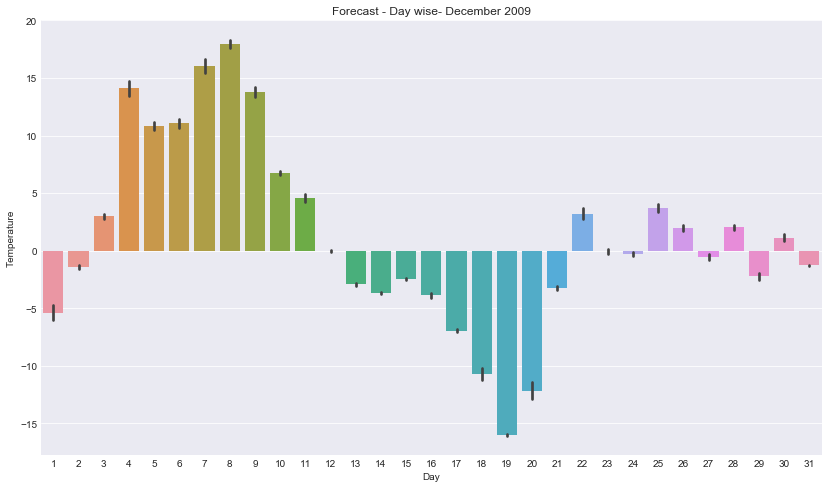

In [69]:
#Now plotting a graph for  Day vs Temperature
plt.figure(figsize=(14,8))
plt.title('Forecast - Day wise- December 2009')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="dom", y="T (degC)", data=df_filtered_by_month)
fig.set(xlabel='Day', ylabel='Temperature')

## Observation
    Here if we see the temperature has gradually dropped after December mid showing the starting of WINTER and 
    has reached as low as -15 deg celsius.
    

In [79]:
#Now for visualizing the forecast for each month during the year 2009 we must first filter the samples

df_filtered_by_year = df.query('year==2009')
df_filtered_by_year

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),dom,Weekday,hour,month,year
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30,1,3,0,1,2009
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10,1,3,0,1,2009
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60,1,3,0,1,2009
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00,1,3,0,1,2009
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30,1,3,0,1,2009
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70,1,3,1,1,2009
6,2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50,1,3,1,1,2009
7,2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60,1,3,1,1,2009
8,2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50,1,3,1,1,2009
9,2009-01-01 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00,1,3,1,1,2009


[Text(0,0.5,'Temperature'), Text(0.5,0,'Month')]

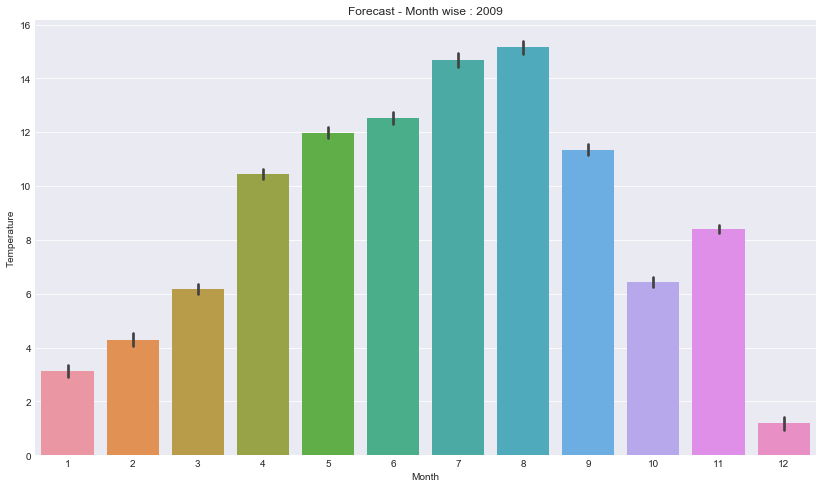

In [71]:
#Now plotting a graph for  Month vs Temperature
plt.figure(figsize=(14,8))
plt.title('Forecast - Month wise : 2009')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="month", y="T (degC)", data=df_filtered_by_year)
fig.set(xlabel='Month', ylabel='Temperature')

## Observation
    Here if we see August has recorder the highest temperature and December being the least. We could also see the uncertainity in the temperature drop between October and November.

In [83]:
#Now for visualizing the forecast for every hour on 12/01/2009 we must first filter the samples

df_filtered_by_hour = df.query('dom==1 and month==12 and year==2009')
df_filtered_by_hour

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),dom,Weekday,hour,month,year
1583,2009-12-01 00:00:00,1003.34,-8.96,263.95,-10.57,88.00,3.10,2.72,0.37,1.69,2.72,1321.60,2.71,4.38,174.0,1,1,0,12,2009
1584,2009-12-01 00:10:00,1003.25,-8.87,264.04,-10.59,87.20,3.12,2.72,0.40,1.69,2.71,1321.03,2.88,4.25,181.6,1,1,0,12,2009
1585,2009-12-01 00:20:00,1003.21,-8.95,263.97,-10.79,86.40,3.10,2.68,0.42,1.66,2.67,1321.40,3.05,4.38,181.3,1,1,0,12,2009
1586,2009-12-01 00:30:00,1003.10,-9.15,263.78,-10.96,86.60,3.05,2.64,0.41,1.64,2.63,1322.27,3.24,4.38,176.5,1,1,0,12,2009
1587,2009-12-01 00:40:00,1003.01,-9.14,263.79,-10.88,87.10,3.05,2.66,0.39,1.65,2.65,1322.09,3.00,4.63,175.2,1,1,0,12,2009
1588,2009-12-01 00:50:00,1002.86,-8.82,264.12,-10.56,87.10,3.13,2.73,0.40,1.69,2.72,1320.27,2.85,4.25,182.7,1,1,0,12,2009
1589,2009-12-01 01:00:00,1002.67,-8.80,264.16,-10.67,86.20,3.13,2.70,0.43,1.68,2.70,1319.93,2.58,3.75,197.4,1,1,1,12,2009
1590,2009-12-01 01:10:00,1002.64,-8.68,264.28,-10.52,86.40,3.16,2.73,0.43,1.70,2.73,1319.27,2.09,3.50,187.0,1,1,1,12,2009
1591,2009-12-01 01:20:00,1002.64,-8.60,264.36,-10.55,85.70,3.18,2.73,0.46,1.69,2.72,1318.87,2.12,3.00,194.0,1,1,1,12,2009
1592,2009-12-01 01:30:00,1002.52,-8.55,264.42,-10.48,85.80,3.20,2.74,0.45,1.70,2.74,1318.46,2.06,2.75,204.2,1,1,1,12,2009


In [ ]:
## Observation
    Here if we see August has recorder the highest temperature and December being the least. We could also see the uncertainity in the temperature drop between October and November.

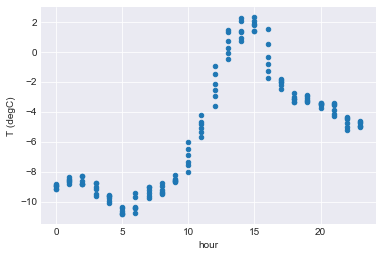

In [94]:
# plotting a scatter plot between Hour vs Temperature  

df_filtered_by_hour.plot(kind="scatter", x="hour", y="T (degC)", alpha=1)
plt.show()

## Observation
    The temperature difference is actually expected as usual being high temperature during afternoon and low temperatures during night.